In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load data file
df=pd.read_csv('updated_data.csv')
df.head()

,Gender,bodyFrame_Breadth,skin_Nature,skin_Color,weight_Changes,nails_color,teeth_Color,teeth_Shape,recalling_speed,memorizing_speed,...,appetite_Frequency,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,Male,Thin/Narrow,Dry,Whitish,Gainandloseeasily,Pink,MilkyWhite,Regular,Moderately,Moderately,...,Regular,Regular,Medium,Medium,Grade1,Grade2,Good,Quickly,Non_Argumentative,Vata
1,Male,Broad,Normal,Whitish,Gainandloseeasily,Reddish,MilkyWhite,Regular,Moderately,Moderately,...,Regular,Regular,Medium,Medium,Grade2,Grade3,Poor,Slowly,Non_Argumentative,Kapha
2,Male,Thin/Narrow,Dry,Whitish,Difficultyingaining,Pink,Yellowish,Irregular,Slowly,Moderately,...,Irregular,Regular,Medium,Hard,Grade1,Grade2,Poor,Moderately,Non_Argumentative,Vata
3,Male,Thin/Narrow,Dry,FairPaleYellow,Difficultyingaining,Pink,Dull/Blackish,Regular,Variably,Quickly,...,Irregular,Regular,Medium,Hard,Grade1,Grade1,Medium,Quickly,Non_Argumentative,Vata
4,Male,Broad,Normal,Dark,Gaineasilyandlosewithdifficulty,Pink,MilkyWhite,Regular,Moderately,Slowly,...,Regular,Regular,Medium,Medium,Grade2,Grade3,Good,Moderately,Non_Argumentative,Kapha


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data = df.apply(le.fit_transform)

data.head()

,Gender,bodyFrame_Breadth,skin_Nature,skin_Color,weight_Changes,nails_color,teeth_Color,teeth_Shape,recalling_speed,memorizing_speed,...,appetite_Frequency,bladder_Frequency,perspiration_Amount,stool_Consistency,mental_Power,physical_Power,Anger_Freq,Irritability_speed,speech_Argumentative,class
0,1,2,0,4,1,1,1,1,0,0,...,1,1,2,2,0,1,0,1,1,2
1,1,0,1,4,1,2,1,1,0,0,...,1,1,2,2,1,2,2,2,1,0
2,1,2,0,4,0,1,2,0,2,0,...,0,1,2,0,0,1,2,0,1,2
3,1,2,0,1,0,1,0,1,3,1,...,0,1,2,0,0,0,1,1,1,2
4,1,0,1,0,2,1,1,1,0,2,...,1,1,2,2,1,2,0,0,1,0


In [4]:
from sklearn.model_selection import train_test_split

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

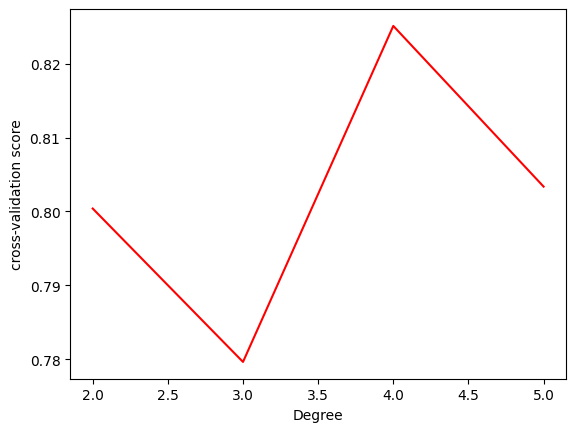

In [7]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
a_scores=[]
a_range=list(range(2,6))
for a in a_range:
    t_svc = svm.SVC(kernel='poly', degree=a, C=1).fit(X_train, y_train)
    scores=cross_val_score(estimator=t_svc, X=X_test, y=y_test, cv=2)
    #print(scores)
    a_scores.append(scores.mean())
#print(np.round(a_scores,3)) # to display scores to 3 decimal places

plt.plot(a_range,a_scores,color="red")
plt.xlabel('Degree')
plt.ylabel('cross-validation score')
plt.show()

In [8]:
a=4
t_svc = svm.SVC(kernel='poly', degree=a, C=1).fit(X_train, y_train)
#predict
y_pred = t_svc.predict(X_test)  
## See how the model performs on the test data.
t_svc.score(X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.80      0.89      0.84         9
           2       0.95      0.86      0.90        22

    accuracy                           0.91        45
   macro avg       0.89      0.92      0.90        45
weighted avg       0.91      0.91      0.91        45



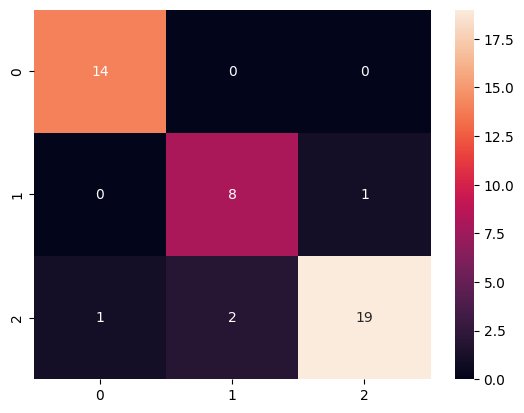

In [10]:
import seaborn as sn

cm  = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)
plt.show()